In [2]:
#import potrzebnych bibliotek
import numpy as np 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#zaladowanie i podzial danych na zbiór testowy i treningowy  35%-65%
source="dane3.txt"
x=[]
y=[]

with open(source) as lines:
    for line in lines:
        args = line.split(" ")
        x.append(float(args[0]))
        y.append(float(args[1]))

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.65)

#wypisuje poczatkowa macierz argumentow
print('Initial arguments')
print(x_train)
#prosty model liniowy
n=len(x_train)
#licze srednia x i y
x_mean=np.mean(x_train)
y_mean=np.mean(y_train)
b_nominator=0
b_denominator=0
#wypisanie rownan
print('general formula: y=a+b*x')
print('b formula: E[(xi-xMean)(yi-yMean)]/E[(xi-xMean)^2]')
print('a formula: yMean-b*xMean')
for i in range(n):
    b_nominator+=(x_train[i]-x_mean)*(y_train[i]-y_mean)
    b_denominator+=np.square(x_train[i]-x_mean)

b=(b_nominator/b_denominator).item()
a=(y_mean-(b*x_mean)).item()

print('b: {}'.format(b))
print('a: {}'.format(a))
#'krzywa treningowa'
y_train_func=a+b*np.array(x_train).astype(float)
#wyniki klasyfikacji
y_pred=a+b*np.array(x_test).astype(float)

#wyliczanie bledu
delta_square_sum=0
for i in range(len(y_test)):
    delta_square_sum+=np.square(y_pred[i]-y_test[i])

error = delta_square_sum/len(y_test) 
print('Average mean squared error on the test data {}'.format(error))

#wykreslenie wyniku
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_test, y_test, color='green', label='Test data')
#poniewaz dane train_test_split zwrócone sa w losowej kolejnosci, sortuje je zeby matplotlib dobrze wykreslil funkcje
indexes=np.argsort(x_train)
plt.plot(np.array(x_train)[indexes], np.array(y_train_func)[indexes], color='purple', label='Train curve(derived)')
plt.legend()
plt.show()


Initial arguments
[-2.0, -0.2, -0.1, 0.7, 2.1, -2.9, 2.7, -2.8, 1.0, -0.5, 2.8, 2.4, -0.9, -2.4, -1.4, 1.2, -2.5, 2.3, -1.526557e-15, -0.6, 1.8, 2.5, 3.0, 2.6, 1.1, -2.2, -1.0, 0.2, 0.9, 2.2, 2.0, 0.8, 1.5, 0.6, -1.7, 0.3, -0.8, 1.3, -1.9]
general formula: y=a+b*x
b formula: E[(xi-xMean)(yi-yMean)]/E[(xi-xMean)^2]
a formula: yMean-b*xMean
b: 0.018644295469687194
a: 0.9836844611491484
Average mean squared error on the test data 0.41481856977896564


<Figure size 640x480 with 1 Axes>

Formula for function coefficients: (X^T * X)^-1 * X^T * y
Initial arguments matrix
[[ 1.00000000e+00 -2.00000000e+00  4.00000000e+00 -8.00000000e+00
   1.60000000e+01 -3.20000000e+01  6.40000000e+01]
 [ 1.00000000e+00 -2.00000000e-01  4.00000000e-02 -8.00000000e-03
   1.60000000e-03 -3.20000000e-04  6.40000000e-05]
 [ 1.00000000e+00 -1.00000000e-01  1.00000000e-02 -1.00000000e-03
   1.00000000e-04 -1.00000000e-05  1.00000000e-06]
 [ 1.00000000e+00  7.00000000e-01  4.90000000e-01  3.43000000e-01
   2.40100000e-01  1.68070000e-01  1.17649000e-01]
 [ 1.00000000e+00  2.10000000e+00  4.41000000e+00  9.26100000e+00
   1.94481000e+01  4.08410100e+01  8.57661210e+01]
 [ 1.00000000e+00 -2.90000000e+00  8.41000000e+00 -2.43890000e+01
   7.07281000e+01 -2.05111490e+02  5.94823321e+02]
 [ 1.00000000e+00  2.70000000e+00  7.29000000e+00  1.96830000e+01
   5.31441000e+01  1.43489070e+02  3.87420489e+02]
 [ 1.00000000e+00 -2.80000000e+00  7.84000000e+00 -2.19520000e+01
   6.14656000e+01 -1.72103680e+0

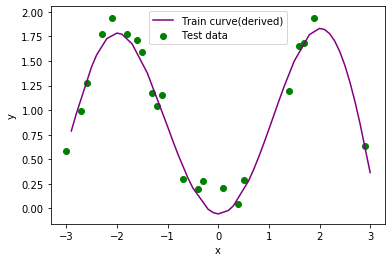

In [5]:
#model wielomianowy

print('Formula for function coefficients: (X^T * X)^-1 * X^T * y')
#szósty stopien wybrany na podstawie empirycznych testow(m.in od ktorego momentu overfitting zaczyna byc widoczny), wygladu przebiegu funkcji i intuicji :)
N=6 #zakladam ze N>=1
columns=[]
for i in range(N+1):
    columns.append(np.power(x_train, i))
X=np.c_[tuple(columns)]   
#wypisuje poczatkowa macierz argumentow
print('Initial arguments matrix')
print(X)
step1 = np.linalg.inv(X.T@X)
step2 = step1@X.T
coefficients = step2@y_train
#wypisuje wspolczynniki
print('Coefficients(calculated):')
print(coefficients)

#'krzywa treningowa'
y_pred=coefficients[0]+coefficients[1]*np.array(x_test)
#wyniki klasyfikacji
y_train_func=coefficients[0]+coefficients[1]*np.array(x_train)
for i in range(2,N+1):
    y_train_func+=coefficients[i]*np.array(np.power(x_train,i))
    y_pred+=coefficients[i]*np.array(np.power(x_test,i))

#wyliczanie bledu
error=np.sum(np.square(y_pred-y_test))/len(y_test)
print('Average mean squared error on the test data {}'.format(error))

#wykreslenie wynikow
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_test, y_test, color='green', label='Test data')
#poniewaz dane train_test_split zwrócone sa w losowej kolejnosci, sortuje je zeby matplotlib dobrze wykreslil funkcje
indexes=np.argsort(x_train)
plt.plot(np.array(x_train)[indexes], np.array(y_train_func)[indexes], color='purple', label='Train curve(derived)')
plt.legend()
plt.show()

Jak widać regresja wielomianowa (w tym wypadku stopnia 6) jest znaczaco lepsza od regresji liniowej, dla tych konkretnych danych wielkość błędu różni się 1 rzędem wielkości. Dokładna wartość oczywiście zależy od konkretnych danych treningowych i testowych, jednakże przy takim podziale zbioru jest to konsystentnie ponad 25krotnie mniejszy wynik. Na wykresach ta różnica jest jeszcze wyraźniejsza.